In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objs as go
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Data & show sample

df = pd.read_csv('/content/drive/MyDrive/Rakamin Project/application_train.csv')
df.sample(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
272058,415393,1,Cash loans,F,N,Y,1,67500.0,269550.0,18234.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
297805,445015,0,Cash loans,M,Y,N,1,450000.0,1236393.0,117391.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
178970,307393,0,Revolving loans,F,Y,Y,0,292500.0,810000.0,40500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
60304,169920,0,Cash loans,M,N,N,0,148500.0,234324.0,15655.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
57128,166216,1,Cash loans,F,N,N,0,157500.0,500211.0,25407.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0


# **Data Exploration**

In [3]:
# Show Data Rows & Features Number
print("Total Rows :", df.shape[0])
print("Total Features :", df.shape[1])

Total Rows : 307511
Total Features : 122


In [4]:
# Check duplicated value
df.duplicated().sum()

0

In [5]:
# Show Data Info

list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:5]])
desc_df = pd.DataFrame(data=list_item, columns='Feature,Data Type,Null, Null (%),Unique,Unique Sample'.split(","))
desc_df

,Feature,Data Type,Null,Null (%),Unique,Unique Sample
0,SK_ID_CURR,int64,0,0.000000,307511,"[100002, 100003, 100004, 100006, 100007]"
1,TARGET,int64,0,0.000000,2,"[1, 0]"
2,NAME_CONTRACT_TYPE,object,0,0.000000,2,"[Cash loans, Revolving loans]"
3,CODE_GENDER,object,0,0.000000,3,"[M, F, XNA]"
4,FLAG_OWN_CAR,object,0,0.000000,2,"[N, Y]"
5,FLAG_OWN_REALTY,object,0,0.000000,2,"[Y, N]"
6,CNT_CHILDREN,int64,0,0.000000,15,"[0, 1, 2, 3, 4]"
7,AMT_INCOME_TOTAL,float64,0,0.000000,2548,"[202500.0, 270000.0, 67500.0, 135000.0, 121500.0]"
8,AMT_CREDIT,float64,0,0.000000,5603,"[406597.5, 1293502.5, 135000.0, 312682.5, 5130..."
9,AMT_ANNUITY,float64,12,0.003902,13672,"[24700.5, 35698.5, 6750.0, 29686.5, 21865.5]"


- Feature `SK_ID_CURR`will be drop because high number of unique value
- `TARGET`will be target 
- `CODE_GENDER` have "XNA" value and will be impute with mode
- `NAME_FAMILY_STATUS	` will be divided into 2 value for modeling
- Feature with >20% Null value will be dropped

**Check Missing Value**

In [6]:
# Total null values
total_null = df.isnull().sum()
percent_missing = df.isnull().sum() * 100/ len(df)
dtypes = [df[col].dtype for col in df.columns]
df_missing_value = pd.DataFrame({'total_null': total_null,
                                'data_type': dtypes,
                                'percent_missing': percent_missing})
df_missing_value.sort_values('percent_missing', ascending = False,inplace = True)
missing_value = df_missing_value[df_missing_value['percent_missing']>0].reset_index()
missing_value

,index,total_null,data_type,percent_missing
0,COMMONAREA_MEDI,214865,float64,69.872297
1,COMMONAREA_AVG,214865,float64,69.872297
2,COMMONAREA_MODE,214865,float64,69.872297
3,NONLIVINGAPARTMENTS_MODE,213514,float64,69.432963
4,NONLIVINGAPARTMENTS_AVG,213514,float64,69.432963
5,NONLIVINGAPARTMENTS_MEDI,213514,float64,69.432963
6,FONDKAPREMONT_MODE,210295,object,68.386172
7,LIVINGAPARTMENTS_MODE,210199,float64,68.354953
8,LIVINGAPARTMENTS_AVG,210199,float64,68.354953
9,LIVINGAPARTMENTS_MEDI,210199,float64,68.354953


We will have to handle these missing values (known as imputation). Other option would be to drop all those columns where there are large number of missing values. Unless we know the feature importance, it is not possible to make a call on which columns to keep which ones to drop.

**How are the target labels spread?**

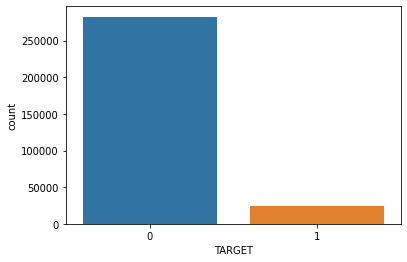

In [7]:
sns.countplot(df.TARGET)

## **General Preprocessing**

In [8]:
# Drop feature that have more than 20% missing value
col_full_null = pd.DataFrame(df.isnull().sum()/len(df)*100).reset_index().rename(columns={'index':'feature',0:'missing'})

# filter feature that only has missing value < 20%
col_full_null = col_full_null[col_full_null['missing'] < 20]
col_full_null

,feature,missing
0,SK_ID_CURR,0.000000
1,TARGET,0.000000
2,NAME_CONTRACT_TYPE,0.000000
3,CODE_GENDER,0.000000
4,FLAG_OWN_CAR,0.000000
5,FLAG_OWN_REALTY,0.000000
6,CNT_CHILDREN,0.000000
7,AMT_INCOME_TOTAL,0.000000
8,AMT_CREDIT,0.000000
9,AMT_ANNUITY,0.003902


In [9]:
# extract columns
col = col_full_null['feature'].to_list()

# assign to new df_clean
df = df[col]

# **Exploratory Data Analysis**

In [10]:
eda = df.copy()

# Devide the features to num and cat
num = eda.select_dtypes(exclude = 'object').columns
cat = eda.select_dtypes(include = 'object').columns

## **Descriptive Statistic Analysis**

**Numeric Features**

In [11]:
eda[num].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.000000e+00,0.000000,0.000000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,2.565000e+04,112500.000000,147150.000000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,4.050000e+04,238500.000000,450000.000000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,2.900000e-04,0.010006,0.018850,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-2.522900e+04,-19682.000000,-15750.000000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-1.791200e+04,-2760.000000,-1213.000000,-289.000000,3.652430e+05


**Categorical Features**

In [12]:
eda[cat].describe().transpose()

,count,unique,top,freq
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
CODE_GENDER,307511,3,F,202448
FLAG_OWN_CAR,307511,2,N,202924
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_TYPE_SUITE,306219,7,Unaccompanied,248526
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
NAME_FAMILY_STATUS,307511,6,Married,196432
NAME_HOUSING_TYPE,307511,6,House / apartment,272868
WEEKDAY_APPR_PROCESS_START,307511,7,TUESDAY,53901


# **Data Preprocessing**

In [13]:
df_clean = df.copy()

## **Handle Missing Value**

In [14]:
# Total null values
total_null = df_clean.isnull().sum()
percent_missing = df_clean.isnull().sum() * 100/ len(df)
dtypes = [df_clean[col].dtype for col in df_clean.columns]
df_missing_value = pd.DataFrame({'total_null': total_null,
                                'data_type': dtypes,
                                'percent_missing': percent_missing})
df_missing_value.sort_values('percent_missing', ascending = False,inplace = True)
missing_value = df_missing_value[df_missing_value['percent_missing']>0].reset_index()
missing_value

,index,total_null,data_type,percent_missing
0,EXT_SOURCE_3,60965,float64,19.825307
1,AMT_REQ_CREDIT_BUREAU_YEAR,41519,float64,13.501631
2,AMT_REQ_CREDIT_BUREAU_QRT,41519,float64,13.501631
3,AMT_REQ_CREDIT_BUREAU_MON,41519,float64,13.501631
4,AMT_REQ_CREDIT_BUREAU_WEEK,41519,float64,13.501631
5,AMT_REQ_CREDIT_BUREAU_DAY,41519,float64,13.501631
6,AMT_REQ_CREDIT_BUREAU_HOUR,41519,float64,13.501631
7,NAME_TYPE_SUITE,1292,object,0.420148
8,DEF_60_CNT_SOCIAL_CIRCLE,1021,float64,0.332021
9,OBS_30_CNT_SOCIAL_CIRCLE,1021,float64,0.332021


## **Feature Engineering**

In [15]:
# Replacing CODE GENDER values
df_clean['CODE_GENDER'].replace (to_replace = 'XNA', value = df_clean['CODE_GENDER'].mode()[0], inplace = True)

# Replacing NAME_FAMILY_STATUS values 
single = ['Single / not married','Separated','Widow']
married = ['Civil marriage']

df_clean['NAME_FAMILY_STATUS'].replace(to_replace = single, value = 'Single', inplace = True)
df_clean['NAME_FAMILY_STATUS'].replace(to_replace = married, value = 'Married', inplace = True)
df_clean['NAME_FAMILY_STATUS'].replace(to_replace = 'Unknown', value = df_clean['NAME_FAMILY_STATUS'].mode()[0], inplace = True)

1. debt-to-income ratio(DIR) = Credit amount of the loan / Total Income = AMT_CREDIT/AMT_INCOME_TOTAL
2. annuity-to-income ratio(AIR) = Loan annuity / Total Income = AMT_ANNUITY/AMT_INCOME_TOTAL
3. annuity-to-credit ratio(ACR) = Loan annuity/ Credit amount of the loan = AMT_ANNUITY/AMT_CREDIT
4. days-employed-to-age ratio(DAR) = Number of days employed/ Age of applicant = DAYS_EMPLOYED/DAYS_BIRTH

In [16]:
df_clean['DIR'] = df_clean['AMT_CREDIT']/df_clean['AMT_INCOME_TOTAL']
df_clean['AIR'] = df_clean['AMT_ANNUITY']/df_clean['AMT_INCOME_TOTAL']
df_clean['ACR'] = df_clean['AMT_ANNUITY']/df_clean['AMT_CREDIT']
df_clean['DAR'] = df_clean['DAYS_EMPLOYED']/df_clean['DAYS_BIRTH']

## **Feature Extraction**

In [17]:
# Feature extraction
df_clean['YEAR_BIRTH'] = round((df_clean['DAYS_BIRTH'].abs()/365),0)
df_clean['YEAR_EMPLOYED'] = round((df_clean['DAYS_EMPLOYED'].abs()/365),0)
df_clean['YEAR_REGISTRATION'] = round((df_clean['DAYS_REGISTRATION'].abs()/365),0)
df_clean['YEAR_ID_PUBLISH'] = round((df_clean['DAYS_ID_PUBLISH'].abs()/365),0)
df_clean['YEAR_LAST_PHONE_CHANGE'] = round((df_clean['DAYS_LAST_PHONE_CHANGE'].abs()/365),0)
df_clean['AVG_EXT_SOURCE'] = (df_clean['EXT_SOURCE_2'] + df_clean['EXT_SOURCE_3'])/2
df_clean['AVG_FLAG_DOCS'] = (df_clean['FLAG_DOCUMENT_2'] + df_clean['FLAG_DOCUMENT_3'] + df_clean['FLAG_DOCUMENT_4'] + df_clean['FLAG_DOCUMENT_5'] + df_clean['FLAG_DOCUMENT_6'] +
                          df_clean['FLAG_DOCUMENT_7'] + df_clean['FLAG_DOCUMENT_8'] + df_clean['FLAG_DOCUMENT_9'] + df_clean['FLAG_DOCUMENT_10'] + df_clean['FLAG_DOCUMENT_11'] +
                          df_clean['FLAG_DOCUMENT_12'] + df_clean['FLAG_DOCUMENT_13'] + df_clean['FLAG_DOCUMENT_14'] + df_clean['FLAG_DOCUMENT_15'] + df_clean['FLAG_DOCUMENT_16'] +
                          df_clean['FLAG_DOCUMENT_17'] + df_clean['FLAG_DOCUMENT_18'] + df_clean['FLAG_DOCUMENT_19'] + df_clean['FLAG_DOCUMENT_20'] + df_clean['FLAG_DOCUMENT_21'])/20

## **Feature Selection**

In [18]:

df_clean.drop(columns=['EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','DAYS_LAST_PHONE_CHANGE',
                    'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 
                    'FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 
                    'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19', 
                    'FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
                    'FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT_W_CITY','HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION',
                    'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY',
                    'LIVE_CITY_NOT_WORK_CITY'], inplace = True)

# **Modelling**

In [ ]:
pip install pycaret

In [20]:
from pycaret.classification import *

In [21]:
# Devide the features to num and cat
num = df_clean.select_dtypes(exclude = 'object').columns
cat = df_clean.select_dtypes(include = 'object').columns

In [22]:
num

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'DIR', 'AIR',
       'ACR', 'DAR', 'YEAR_BIRTH', 'YEAR_EMPLOYED', 'YEAR_REGISTRATION',
       'YEAR_ID_PUBLISH', 'YEAR_LAST_PHONE_CHANGE', 'AVG_EXT_SOURCE',
       'AVG_FLAG_DOCS'],
      dtype='object')

In [23]:
cat

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [24]:
allcol = df_clean.drop(columns=['TARGET','SK_ID_CURR'], axis =1)
allcol = allcol.columns

# Define categorical and numeric features
numeric = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'DIR', 'AIR', 'ACR', 'DAR', 'YEAR_BIRTH', 
       'YEAR_EMPLOYED', 'YEAR_REGISTRATION', 'YEAR_ID_PUBLISH', 'YEAR_LAST_PHONE_CHANGE', 'AVG_EXT_SOURCE','AVG_FLAG_DOCS']

categorical = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']

In [26]:
# Define

ordinal = {'NAME_EDUCATION_TYPE' : ['Lower secondary','Secondary / secondary special','Higher education','Incomplete higher','Academic degree'],
           'WEEKDAY_APPR_PROCESS_START' : ['SUNDAY','MONDAY','TUESDAY','WEDNESDAY','THURSDAY','FRIDAY','SATURDAY']}
cardinal = ['ORGANIZATION_TYPE']

# Setup the PARAMETER

experiment = setup(data = df_clean, # data to train
                   target = 'TARGET', # target variable
                   train_size = 0.7, # split size related to train set (default)
                   numeric_features = numeric, #list of numerical
                   imputation_type = 'simple', # pycaret style on imputing null values (default)
                   categorical_imputation = 'mode', # categorical imputation using mode
                   numeric_imputation = 'median', # numerical imputation using median
                   high_cardinality_features = cardinal, # specifically for categorical features with many levels 
                   high_cardinality_method = 'frequency', # how the high cardinality features will be encoded
                   ignore_features = ['SK_ID_CURR'], # ignoring the original index-like feature 
                   ordinal_features = ordinal, # specifically for categorical features with ordinal number
                   normalize = True, # wether the scalling of numerical features will be performed or not
                   normalize_method = 'minmax', # how pycaret will be re-scalling the data
                   remove_outliers = True, # outliers are removed using PCA linear dimensionality reduction using the Singular Value Decomposition technique.
                   remove_multicollinearity = True,  # wether the multicolinearity will be dropped or not 
                   multicollinearity_threshold= 0.7, # pycaret will drop features that match the given threshold (default)
                   feature_selection = True, # This will selectively choose feature using permutaion of feature importance (default: 'classic', threshold 0.8)
                   feature_selection_threshold = 0.6, 
                   fix_imbalance = True, # fixing target imbalance, (default will automatically use SMOTE)
                   fold = 3, # cross validation strategy (default will automatically choose StratifiedKFold)
                   session_id = 42, # same as seed / random_state
                   verbose = False) 

INFO:logs:PyCaret Supervised Module
INFO:logs:ML Usecase: classification
INFO:logs:version 2.3.10
INFO:logs:Initializing setup()
INFO:logs:setup(target=TARGET, ml_usecase=classification, available_plots={'parameter': 'Hyperparameters', 'auc': 'AUC', 'confusion_matrix': 'Confusion Matrix', 'threshold': 'Threshold', 'pr': 'Precision Recall', 'error': 'Prediction Error', 'class_report': 'Class Report', 'rfe': 'Feature Selection', 'learning': 'Learning Curve', 'manifold': 'Manifold Learning', 'calibration': 'Calibration Curve', 'vc': 'Validation Curve', 'dimension': 'Dimensions', 'feature': 'Feature Importance', 'feature_all': 'Feature Importance (All)', 'boundary': 'Decision Boundary', 'lift': 'Lift Chart', 'gain': 'Gain Chart', 'tree': 'Decision Tree', 'ks': 'KS Statistic Plot'}, train_size=0.7, test_data=None, preprocess=True, imputation_type=simple, iterative_imputation_iters=5, categorical_features=None, categorical_imputation=mode, categorical_iterative_imputer=lightgbm, ordinal_feat

Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
NAME_CONTRACT_TYPE,Categorical
CODE_GENDER,Categorical
FLAG_OWN_CAR,Categorical
FLAG_OWN_REALTY,Categorical
CNT_CHILDREN,Numeric
AMT_INCOME_TOTAL,Numeric
AMT_CREDIT,Numeric
AMT_ANNUITY,Numeric
AMT_GOODS_PRICE,Numeric
NAME_TYPE_SUITE,Categorical


INFO:logs:Creating grid variables
INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True,
                                      features_todrop=['SK_ID_CURR'],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=['CNT_CHILDREN',
                                                          'AMT_INCOME_TOTAL',
                                                          'AMT_CREDIT',
                                                          'AMT_ANNUITY',
                                                          'AMT_GOODS_PRICE',
                                                          'REGION_POPULATION_RELATIVE',
                               

## **Comparing Model**

In [27]:
# Listing models that will be compared
model = ['lr','dt','rf','ada','knn'] 

# Comparing models
best_model = compare_models(include = model, # Catching model list
                            sort = 'AUC') # Sorting on AUC score

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6790,0.7224,0.6444,0.1511,0.2448,0.1312,0.1872,24.3533
rf,Random Forest Classifier,0.9187,0.6923,0.0059,0.3156,0.0115,0.0086,0.0334,69.5833
ada,Ada Boost Classifier,0.8643,0.6534,0.1613,0.1606,0.1605,0.0869,0.0870,29.7733
knn,K Neighbors Classifier,0.7016,0.5843,0.3952,0.1134,0.1762,0.0580,0.0750,346.3967
dt,Decision Tree Classifier,0.8376,0.5292,0.1613,0.1209,0.1382,0.0506,0.0513,6.8333


INFO:logs:create_model_container: 5
INFO:logs:master_model_container: 5
INFO:logs:display_container: 2
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


## **Create Actual Best Model**

In [32]:
lr = create_model('lr', # Capturing the best model based on specified evaluation metric
                  return_train_score = True) # show the train score

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Split    Fold                                                          
CV-Train 0       0.6777  0.7234  0.6452  0.1507  0.2443  0.1304  0.1866
         1       0.6808  0.7256  0.6475  0.1524  0.2468  0.1335  0.1901
         2       0.6790  0.7213  0.6431  0.1509  0.2445  0.1308  0.1865
CV-Val   0       0.6780  0.7239  0.6538  0.1522  0.2470  0.1334  0.1912
         1       0.6790  0.7178  0.6361  0.1498  0.2425  0.1285  0.1830
         2       0.6800  0.7255  0.6432  0.1514  0.2451  0.1315  0.1873
CV-Train Mean    0.6791  0.7234  0.6453  0.1513  0.2452  0.1316  0.1877
         Std     0.0013  0.0017  0.0018  0.0008  0.0011  0.0014  0.0017
CV-Val   Mean    0.6790  0.7224  0.6444  0.1511  0.2448  0.1312  0.1872
         Std     0.0008  0.0033  0.0072  0.0010  0.0018  0.0020  0.0033
Train    NaN     0.6792  0.7238  0.6466  0.1516  0.2456  0.1320  0.1884

INFO:logs:create_model_container: 7
INFO:logs:master_model_container: 7
INFO:logs:display_container: 4
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


## **Tuning Best Model**

In [33]:
tuned_lr = tune_model(lr, # Capturing model that was created
                      n_iter = 50, # Iterative number to be used on grid search
                      optimize = 'AUC', # Specified metric that will be optimized
                      return_train_score = True) # Return the train score         

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Split    Fold                                                          
CV-Train 0       0.6783  0.7238  0.6467  0.1512  0.2451  0.1314  0.1878
         1       0.6810  0.7261  0.6465  0.1523  0.2466  0.1333  0.1897
         2       0.6797  0.7219  0.6443  0.1514  0.2452  0.1317  0.1877
CV-Val   0       0.6785  0.7247  0.6552  0.1527  0.2477  0.1343  0.1923
         1       0.6797  0.7182  0.6381  0.1504  0.2434  0.1297  0.1846
         2       0.6804  0.7258  0.6437  0.1516  0.2455  0.1320  0.1879
CV-Train Mean    0.6797  0.7240  0.6458  0.1517  0.2456  0.1321  0.1884
         Std     0.0011  0.0017  0.0011  0.0005  0.0007  0.0008  0.0009
CV-Val   Mean    0.6796  0.7229  0.6457  0.1516  0.2455  0.1320  0.1883
         Std     0.0008  0.0034  0.0071  0.0009  0.0017  0.0019  0.0032
Train    NaN     0.6796  0.7242  0.6475  0.1519  0.2461  0.1326  0.1892

INFO:logs:create_model_container: 8
INFO:logs:master_model_container: 8
INFO:logs:display_container: 5
INFO:logs:LogisticRegression(C=9.885, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [34]:
testpred = predict_model(tuned_lr) 

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LogisticRegression(C=9.885, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), probability_threshold=None, encoded_labels=False, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.CLASSIFICATION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6794,0.7245,0.6464,0.1509,0.2447,0.1316,0.1881


## **ROC Curve**

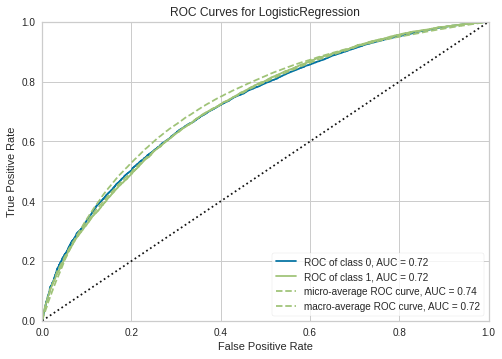

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [35]:
plot_model(tuned_lr, plot = 'auc')

## **KS Statistic**

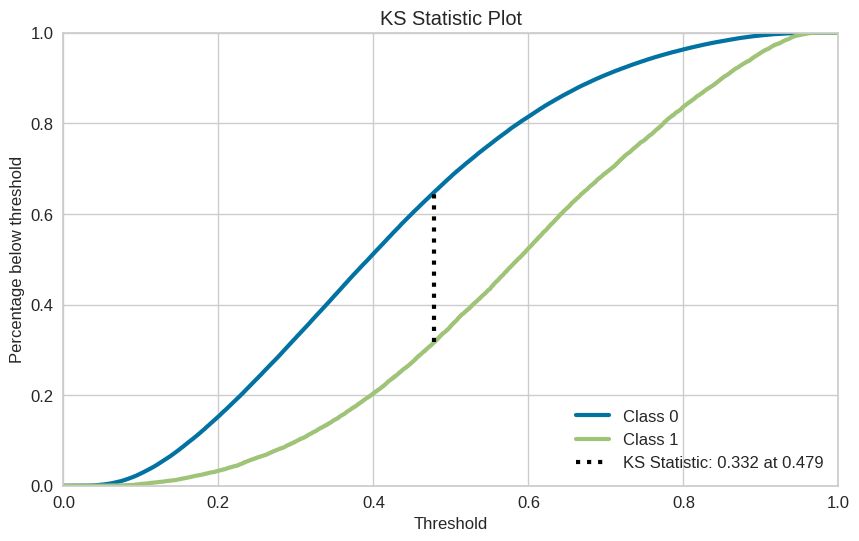

In [36]:
plot_model(tuned_lr, 'ks')

## **Confusion Matrix**

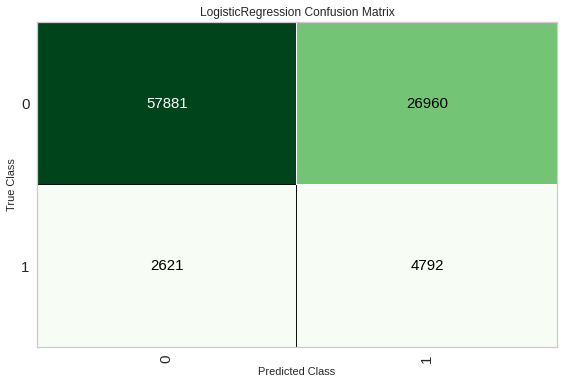

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [37]:
plot_model(tuned_lr, 'confusion_matrix')

## **Feature Importance**

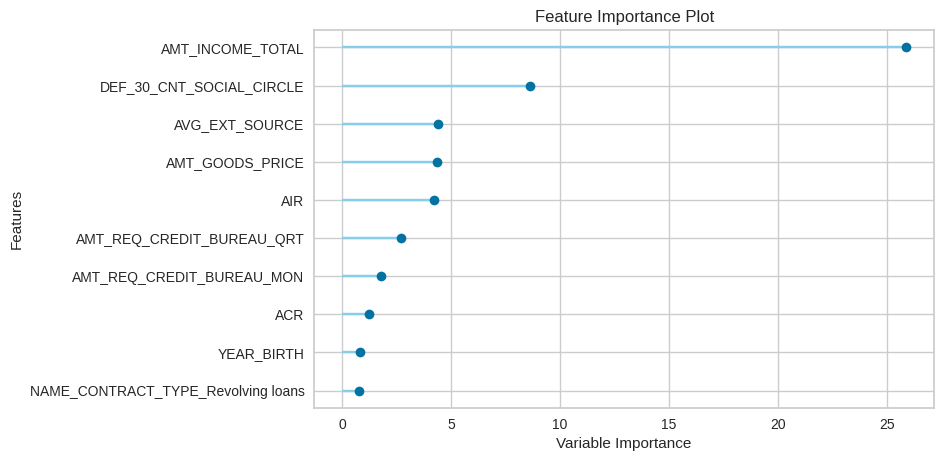

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [38]:
plot_model(tuned_lr, 'feature')

In [39]:
#saving model
final_lgb = finalize_model(tuned_lr) 
save_model(final_lgb, 'Final LightGBM Model')

INFO:logs:Initializing finalize_model()
INFO:logs:finalize_model(estimator=LogisticRegression(C=9.885, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fit_kwargs=None, groups=None, model_only=True, display=None, experiment_custom_tags=None, return_train_score=False)
INFO:logs:Finalizing LogisticRegression(C=9.885, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=LogisticRegression(C=9.885, class_weight={}, dual=False, fit_inter

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['SK_ID_CURR'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['CNT_CHILDREN',
                                                           'AMT_INCOME_TOTAL',
                                                           'AMT_CREDIT',
                                                           'AMT_ANNUITY',
                                                           'AMT_GOODS_PRICE',
                                                           'REGION_POPULATION_RELATIVE',
                                                           'CNT_FAM_MEMBERS',
                                                           'REGION_RATING_CLIENT',
    